# Gradiente Descendente


## A ideia geral do algoritmo é relaticamente simples, dado um mátrica a ser minimzada, iremos tomar sua derivada, que representa a taxa de variação, e iremos empregar esta, atualoizando os parâmetros do modelo, até que tal derivada seja nula.

## Suponto uma variável $w$, iremos o atualizar de acordo com

## $w_i = w_{i-1} - \alpha \frac{dL}{dw} $

## Em que L é a métrica de erro, pode ser o erro quadrático ou o erro absoluto, erro quadrático médio. Em geral não é "tão importante", as vezes a escolha de uma métrica específica pode ajudar.

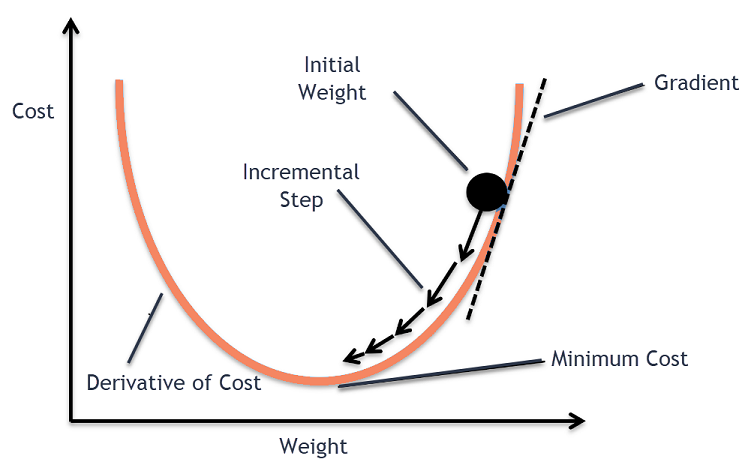

## O parametro $\alpha$ é o passo que o peso toma para chegar no mínimo.

## Passos muito pequenos podem fazer o algoritmo demorar muito;

## Passos muito grandes podem fazer o algoritmo divergir;

## geralmente usasse passos entre [0,1];

## Como encontrar o melhor valor dos passos? Não existe uma regra, na maioria dos textos lhe informaram que esta é uma quantidade empírica, e de fato é. Uma estratégia que eu gosto de usar é observar o quanto o primeiro gradiente irá resultar, e usar um lr que garante que o produto do grad com o lr gere algo entre [0,1]. 

## Isto pois eu sei que o gradiente não irá estourar logo de início.

## No exemplo abaixo, iremos encontrar pos parametros de uma simples função quadrática usando tal método.

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [97]:
class gradient:
    def __init__(self,f,w,dw,batch=20,max_iter = 10000,lr = 0.00000001):
        self.lr = lr
        self.w = w
        self.dw = dw
        self.batch = batch
        self.max_iter = max_iter
        self.f = f


    def fit(self,X,y):
        int_per_batch = int(len(X)/self.batch)
        for _ in range(self.max_iter):
            for j in range(int_per_batch):
                yhat = self.f(X[j*self.batch:(j+1)*self.batch],w)
                loss = np.mean((y[j*self.batch:(j+1)*self.batch] - yhat)**2)
                dw = np.float64((y[j*self.batch:(j+1)*self.batch] -yhat).T @ self.dw(X[j*self.batch:(j+1)*self.batch])).T
                self.w += self.lr*dw
        return self.w

In [316]:
f = lambda x,w: x @ w 

w = np.random.normal(0,1,(3,1))

X = np.arange(-20,20,0.1).reshape(-1,1)

y = X**2 + 5*X + 1 

X_in = np.append(X**2,np.append(X,np.ones(X.shape),axis = 1),axis = 1).reshape(-1,3) # adicionando 1 para poder fazer o produto interno ao invés de multiplicações
print(X_in)

[[400.   -20.     1.  ]
 [396.01 -19.9    1.  ]
 [392.04 -19.8    1.  ]
 ...
 [388.09  19.7    1.  ]
 [392.04  19.8    1.  ]
 [396.01  19.9    1.  ]]


In [317]:
def grad(X,y,w,lr = 0.001):
    lr = 0.00001
    for _ in range(1000):
        yhat = f(X,w)
        loss = np.mean((y - yhat)**2)
        for i in range(len(w)):
            w[i] += (lr*(y-yhat).T @ X[:,i])/len(yhat)
        print('loss:',loss)

    return w.reshape(-1,1)

In [364]:
w = grad(X_in,y,w)
print(w)

loss: 0.06326599860278179
loss: 0.06326543624822645
loss: 0.06326487389866899
loss: 0.06326431155411177
loss: 0.06326374921455269
loss: 0.06326318687999143
loss: 0.06326262455043069
loss: 0.06326206222586532
loss: 0.06326149990630081
loss: 0.06326093759173193
loss: 0.06326037528216284
loss: 0.06325981297759066
loss: 0.06325925067801749
loss: 0.06325868838344326
loss: 0.06325812609386727
loss: 0.06325756380928847
loss: 0.06325700152970609
loss: 0.0632564392551246
loss: 0.06325587698553858
loss: 0.0632553147209531
loss: 0.0632547524613642
loss: 0.06325419020677188
loss: 0.06325362795717869
loss: 0.0632530657125824
loss: 0.06325250347298439
loss: 0.06325194123838454
loss: 0.06325137900878158
loss: 0.06325081678417403
loss: 0.06325025456456687
loss: 0.06324969234995521
loss: 0.06324913014034327
loss: 0.06324856793572736
loss: 0.06324800573610803
loss: 0.06324744354148608
loss: 0.06324688135186203
loss: 0.06324631916723457
loss: 0.06324575698760572
loss: 0.0632451948129728
loss: 0.063244632

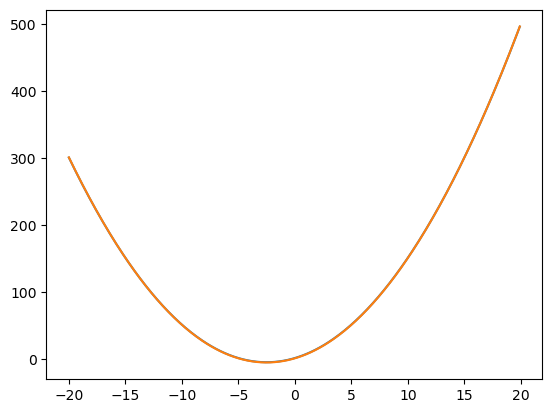

In [365]:
plt.plot(X,f(X_in,w))
plt.plot(X,y)

## É possível notar que o chegamos bem perto do ideal.

## Contudo ainda existe um erro, que pode eventualmente fazer as duas curvas divergirem;

## Como os fatores que acompanham X são quase iguais aos analíticos, então o modelo se comportará bem, contudo, este caso não necessariamentes será verdade sempre;

## Para melhorar ainda mais o algoritmo, ao invés de realizar o gradiente em todos os dados de uma vez, é possível dividir o mesmo em quadros de tamanhos fixos, e isto ajudará ao algoritmo convergir mais rapidamente;

## Ou seja, ao invés de passar os 400 dados, podemos passar apenas 10 primeiros e atualizar os pesos, após isto os 10-20 e atualiza, isso até ter passado por todos os pontos, sendo isto apenas uma única iteração. No nosso caso, iriamos realizar este processo 1000 vezes, sendo que o loop interno de cada conjunto de 10 equivale a 40, totalizando 40000 iterações;